# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\antho\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
# Read your api key environment variable

# YOUR CODE HERE!
load_dotenv()
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
api_key = os.getenv('NEWS_API_KEY')

In [26]:
# Check api keys
print(type(alpaca_api_key))
print(type(alpaca_secret_key))
print(type(api_key))

<class 'str'>
<class 'str'>
<class 'str'>


In [27]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [28]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

7746

In [29]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

3847

In [30]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

#Function to create the bitcoin and ethereum dataframes
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError as ae:
            pass

    return pd.DataFrame(articles)

In [31]:
# Bitcoin sentiment scores Dataframe
bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")

# Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")
ethereum_en_df

,title,description,text,date,language
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01,en
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25,en
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,en
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,en
4,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,"It seems that in 2022, you cant escape from th...",2022-03-03,en
5,How People Actually Make Money From Cryptocurr...,Power traders use “staking” and “yield farming...,"If it sounds too good to be true, youre not wr...",2022-03-13,en
6,'The Goal Of Crypto Is Not To Play Games With ...,An anonymous reader shares a report: Non-fungi...,Non-fungible tokens have risen in interest and...,2022-03-22,en
7,NFT sales fall to $237 million over the past w...,Total NFT sales volume hit $23 billion over th...,The cryptocurrency boom over the past few year...,2022-03-02,en
8,Politicians Show Their Increasing Interest In ...,A dispatch from a dizzying week at one of Nort...,A version of this article was published in TIM...,2022-02-24,en
9,NFT sales hit $455 million over the past week....,Total NFT sales volume hit $24 billion over th...,The cryptocurrency boom over the past few year...,2022-03-23,en


In [32]:
""" Create sentiment score function """

""" BITCOIN """

def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_en_df = bitcoin_en_df.join(title_sentiment_df).join(text_sentiment_df)

In [33]:
""" ETHEREUM """

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_en_df = ethereum_en_df.join(title_sentiment_df).join(text_sentiment_df)

In [34]:
bitcoin_en_df['text'][0]

'Other fund vehicles hold crypto directly, but theyre grappling with different structural problems and carry higher fees, which are a drag on returns.\r\nGrayscale Bitcoin Trust, the largest Bitcoin veh… [+2273 chars]'

In [35]:
ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01,en,-0.3818,0.00,0.698,0.302,-1,-0.3182,0.059,0.848,0.093,-1
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25,en,0.0000,0.00,1.000,0.000,0,0.6705,0.188,0.812,0.000,1
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,en,0.0000,0.00,1.000,0.000,0,-0.4588,0.000,0.917,0.083,-1
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,en,-0.1027,0.11,0.762,0.129,-1,0.0000,0.000,1.000,0.000,0
4,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,"It seems that in 2022, you cant escape from th...",2022-03-03,en,0.0000,0.00,1.000,0.000,0,-0.1326,0.000,0.956,0.044,-1


In [36]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.027750,0.081450,0.814550,0.103950,0.050000,0.153655,0.073850,0.886800,0.039450,0.350000
std,0.271373,0.105278,0.184348,0.144677,0.759155,0.405064,0.052471,0.075536,0.062141,0.875094
min,-0.599400,0.000000,0.515000,0.000000,-1.000000,-0.771300,0.000000,0.730000,0.000000,-1.000000
25%,-0.019300,0.000000,0.615000,0.000000,-0.250000,-0.028850,0.036000,0.852500,0.000000,-0.250000
50%,0.000000,0.000000,0.823000,0.000000,0.000000,0.318200,0.085000,0.879500,0.000000,1.000000
75%,0.165400,0.213750,1.000000,0.210000,1.000000,0.458800,0.107000,0.937000,0.052000,1.000000
max,0.401900,0.247000,1.000000,0.438000,1.000000,0.636900,0.171000,1.000000,0.187000,1.000000


In [37]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.007655,0.031250,0.935800,0.033000,-0.050000,0.184895,0.076450,0.898900,0.024600,0.200000
std,0.176205,0.070197,0.100707,0.076877,0.604805,0.424222,0.096231,0.109702,0.037614,0.767772
min,-0.381800,0.000000,0.698000,0.000000,-1.000000,-0.526700,0.000000,0.682000,0.000000,-1.000000
25%,0.000000,0.000000,0.886250,0.000000,0.000000,0.000000,0.000000,0.841000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.023500,0.919500,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.528675,0.141500,1.000000,0.048500,1.000000
max,0.458800,0.250000,1.000000,0.302000,1.000000,0.867600,0.270000,1.000000,0.115000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereium had the highest mean positive score at 0.078750

Q: Which coin had the highest compound score?

A: Ethereium had the highestest compound score at 0.834

Q. Which coin had the highest positive score?

A:  Ethereium had the highestest positive score of 0.249

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [38]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [39]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

In [171]:
# Create a list of stopwords
# YOUR CODE HERE!

# mystopwords = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'and', 'a']

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw.append("u")
sw.append("it")
sw.append("!")
sw.append("(")
sw.append(")")
sw.append("/")
sw.append("/")
sw.append("-")
            
sw = set(stop)


# Expand the default stopwords list if necessary
# YOUR CODE HERE!

stopwords_expanded = ()

In [41]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [178]:
# Complete the tokenizer function
def tokenizer(text):
    
    """Tokenizes text."""
    
    # Create a tokenized list of the words
    words = word_tokenize(text)
                          
    # Remove the punctuation from text 
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root word
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
             
    # Remove the stop words 
    output = [word for word in words if not word in sw]
    
    return output

In [179]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

bitcoin_en_df['token_text'] = bitcoin_en_df.text.apply(tokenizer)

In [180]:
bitcoin_en_df['token_text']

0     [Other, fund, vehicle, hold, crypto, directly,...
1     [When, Russia, invaded, Ukraine, Niki, Proshin...
2     [SAN, SALVADOR, March, 23, Reuters, El, Salvad...
3     [``, Bitcoin, wa, seen, many, libertarian-lean...
4     [March, 22, Reuters, Bitcoin, n't, anonymous, ...
5     [March, 1, Reuters, Bitcoin, ha, leapt, since,...
6     [Whose, side, cryptocurrency, If, asked, Satos...
7     [Getty, Welcome, Nonfungible, Tidbits, Our, fo...
8     [Here, 's, happened, week, crypto, world, Gett...
9     [Nurphoto/Getty, As, Russia, launched, invasio...
10    [LONDON, March, 4, Reuters, Cryptocurrencies, ...
11    [March, 15, Reuters, Bitcoin, love, flirting, ...
12    [KENNERDELL, Pa., March, 21, Reuters, The, vas...
13    [LONDON, March, 22, Reuters, Bitcoin, climbed,...
14    [SAN, SALVADOR, March, 22, Reuters, El, Salvad...
15    [Feb, 24, Welcome, home, real-time, coverage, ...
16    [SAN, SALVADOR, March, 22, Reuters, El, Salvad...
17    [ul, li, Summary, /li, li, Law, firm, /li,

In [181]:
# # Create a new tokens column for Ethereum
# # YOUR CODE HERE!

ethereum_en_df['token_text'] = ethereum_en_df.text.apply(tokenizer)
ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,token_text
0,Web3 Threatens to Segregate Our Online Lives,Governance tokens seem like a tantalizing solu...,"In February, shit hit the fan in the usual way...",2022-03-01,en,-0.3818,0.00,0.698,0.302,-1,-0.3182,0.059,0.848,0.093,-1,"[In, February, shit, hit, fan, usual, way, An,..."
1,Coinbase earnings show trading of ethereum and...,Ethereum trading volume increased from 15% to ...,Coinbase reported that the share of trading vo...,2022-02-25,en,0.0000,0.00,1.000,0.000,0,0.6705,0.188,0.812,0.000,1,"[Coinbase, reported, share, trading, volume, e..."
2,How Ukrainians are fundraising in cryptocurrency,Millions of dollars of cryptocurrency have flo...,Illustration by James Bareham / The Verge\r\n\...,2022-02-26,en,0.0000,0.00,1.000,0.000,0,-0.4588,0.000,0.917,0.083,-1,"[Illustration, James, Bareham, The, Verge, Mor..."
3,Vitalik Buterin talks about the problems of cr...,The founder of Ethereum confessed his concerns...,His name is Vitalik Buterin and after dedicati...,2022-03-22,en,-0.1027,0.11,0.762,0.129,-1,0.0000,0.000,1.000,0.000,0,"[His, name, Vitalik, Buterin, dedicating, cove..."
4,What You Need to Know About Ethereum's Role in...,This now-seven-year-old decentralized and open...,"It seems that in 2022, you cant escape from th...",2022-03-03,en,0.0000,0.00,1.000,0.000,0,-0.1326,0.000,0.956,0.044,-1,"[It, seems, 2022, cant, escape, metaverse, Fro..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [182]:
from collections import Counter
from nltk import ngrams
import pandas as pd


# tokens = bitcoin_en_df['token_text'][0]
# tokens 

In [183]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N = 2
grams = ngrams(tokenizer(bitcoin_en_df.text.str.cat()), N)
bitcoin_gram_counter = Counter(grams).most_common(10)

In [184]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [185]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(ethereum_en_df.text.str.cat()), N)
eth_gram_counter = Counter(grams).most_common(10)
eth_gram_counter

[(('char', 'The'), 5),
 (('The', 'cryptocurrency'), 4),
 (('cryptocurrency', 'boom'), 4),
 (('boom', 'past'), 4),
 (('past', 'year'), 4),
 (('year', 'ha'), 4),
 (('ha', 'helped'), 4),
 (('helped', 'propel'), 4),
 (('propel', 'newer'), 4),
 (('newer', 'market'), 4)]

In [186]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [187]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bitcoin_token_count = token_count(bitcoin_gram_counter)
bitcoin_token_count

[((('char', 'SAN'), 4), 1),
 ((('SAN', 'SALVADOR'), 4), 1),
 ((('SALVADOR', 'March'), 4), 1),
 ((('Reuters', 'El'), 4), 1),
 ((('El', 'Salvador'), 4), 1),
 ((('March', '22'), 4), 1),
 ((('22', 'Reuters'), 4), 1),
 ((('Reuters', 'Bitcoin'), 4), 1),
 ((('char', 'March'), 3), 1),
 ((('since', 'Russia'), 3), 1)]

In [188]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(eth_gram_counter)

[((('char', 'The'), 5), 1),
 ((('The', 'cryptocurrency'), 4), 1),
 ((('cryptocurrency', 'boom'), 4), 1),
 ((('boom', 'past'), 4), 1),
 ((('past', 'year'), 4), 1),
 ((('year', 'ha'), 4), 1),
 ((('ha', 'helped'), 4), 1),
 ((('helped', 'propel'), 4), 1),
 ((('propel', 'newer'), 4), 1),
 ((('newer', 'market'), 4), 1)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [189]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [190]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE
token_text_df_bitcoin = bitcoin_en_df['token_text']
token_text_df_bitcoin

0     [Other, fund, vehicle, hold, crypto, directly,...
1     [When, Russia, invaded, Ukraine, Niki, Proshin...
2     [SAN, SALVADOR, March, 23, Reuters, El, Salvad...
3     [``, Bitcoin, wa, seen, many, libertarian-lean...
4     [March, 22, Reuters, Bitcoin, n't, anonymous, ...
5     [March, 1, Reuters, Bitcoin, ha, leapt, since,...
6     [Whose, side, cryptocurrency, If, asked, Satos...
7     [Getty, Welcome, Nonfungible, Tidbits, Our, fo...
8     [Here, 's, happened, week, crypto, world, Gett...
9     [Nurphoto/Getty, As, Russia, launched, invasio...
10    [LONDON, March, 4, Reuters, Cryptocurrencies, ...
11    [March, 15, Reuters, Bitcoin, love, flirting, ...
12    [KENNERDELL, Pa., March, 21, Reuters, The, vas...
13    [LONDON, March, 22, Reuters, Bitcoin, climbed,...
14    [SAN, SALVADOR, March, 22, Reuters, El, Salvad...
15    [Feb, 24, Welcome, home, real-time, coverage, ...
16    [SAN, SALVADOR, March, 22, Reuters, El, Salvad...
17    [ul, li, Summary, /li, li, Law, firm, /li,

In [191]:
bitcoin_token_text = ' '.join(str(e) for e in token_text_df)
bitcoin_token_text

'[\'Other\', \'fund\', \'vehicle\', \'hold\', \'crypto\', \'directly\', \'theyre\', \'grappling\', \'different\', \'structural\', \'problem\', \'carry\', \'higher\', \'fee\', \'drag\', \'return\', \'Grayscale\', \'Bitcoin\', \'Trust\', \'largest\', \'Bitcoin\', \'veh…\', \'+2273\', \'char\'] [\'When\', \'Russia\', \'invaded\', \'Ukraine\', \'Niki\', \'Proshin\', \'wa\', \'already\', \'year\', \'making\', \'living\', \'vlogger\', \'—\', \'YouTube\', \'channel\', \'TikTok\', \'channel\', \'Instagram\', \'He\', \'also\', \'ran\', \'online\', \'Russian\', \'club\', \'a…\', \'+5883\', \'char\'] [\'SAN\', \'SALVADOR\', \'March\', \'23\', \'Reuters\', \'El\', \'Salvador\', \'seeking\', \'support\', \'cryptocurrency\', \'exchange\', \'Binance\', \'implementation\', \'bitcoin\', \'legal\', \'tender\', \'issuance\', \'bitcoin\', \'bond\', \'Central…\', \'+1109\', \'char\'] [\'``\', \'Bitcoin\', \'wa\', \'seen\', \'many\', \'libertarian-leaning\', \'fan\', \'kind\', \'doomsday\', \'insurance\', "

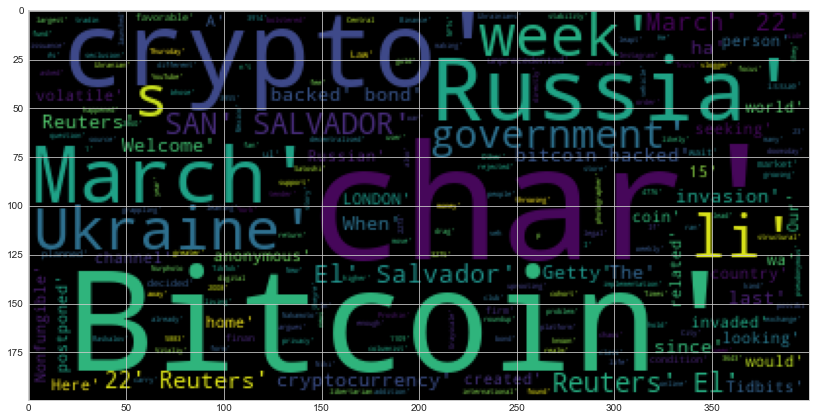

In [192]:
wc = WordCloud().generate(bitcoin_token_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc)

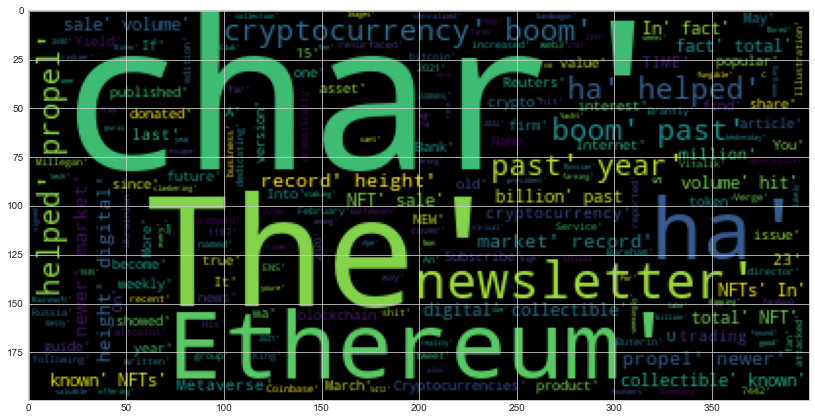

In [193]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
token_text_df_eth = ethereum_en_df['token_text']
ethereum_token_text = ' '.join(str(e) for e in token_text_df_eth)
wc_ethereum = WordCloud().generate(ethereum_token_text)
plt.figure( figsize=(14,8) )
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---